In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [23]:
# 综合模型，包含猎物-捕食者动态、性别分别的繁殖、寄生和竞争效应
def integrated_model(y, t, R, f, lambd, alpha, beta, delta_p, delta_r, gamma_c, delta_c,s,b,alpa,gamma,delta,rho, parasite,host,predator,alligator,prey , competitor):
    N_male, N_female, N_predator, N_parasite, N_competitor = y
    dN_male_dt = R * f - lambd * N_predator * N_male - gamma_c * N_competitor * N_male  # 竞争影响雄性
    dN_female_dt = R * (1 - f) - lambd * N_parasite * N_female - gamma_c * N_competitor * N_female  # 寄生影响雌性
    
    
    dN_predator_dt = alpha * N_predator * N_male - delta_p * N_predator - delta_c * N_competitor * N_predator  # 竞争者影响捕食者
    #dN_predator_dt = s * predator - b * predator * prey
    dN_parasite_dt = beta * N_parasite * N_female - delta_r * N_parasite - delta_c * N_competitor * N_parasite  # 竞争者影响寄生者
    #dN_parasite_dt = alpa * competitor - gamma * competitor * alligator
    dN_competitor_dt = -delta_c * N_competitor # 竞争者的自身动态，可能包括与其他种群的竞争或自身的衰减
    #dN_competitor_dt =  delta * parasite - rho * parasite * host
    return [dN_male_dt, dN_female_dt, dN_predator_dt, dN_parasite_dt, dN_competitor_dt]

In [24]:
# 参数
R = 0.1  # 繁殖率
f = 0.5  # 性别比例
lambd = 0.01  # 捕食/寄生因子
alpha = 0.02  # 捕食者转化率
beta = 0.02  # 寄生者转化率
delta_p = 0.05  # 捕食者死亡率
delta_r = 0.05  # 寄生者死亡率
gamma_c = 0.01  # 竞争对雄性和雌性的影响
delta_c = 0.05  # 竞争者对捕食者和寄生者的影响

In [25]:
# 定义模型参数
s = 0.1  # 捕食者的自然死亡率
b = 0.2  # 捕食率
alpa = 0.3  # 竞争者的自然增长率
gamma = 0.4  # 竞争系数
delta = 0.5  # 寄生者的自然死亡率
rho = 0.6  # 寄生率
# 定义物种数量
N_predator = 100
N_competitor = 100
N_parasite = 100
# 定义初始物种数量
prey = np.random.rand(N_predator)
alligator = np.random.rand(N_competitor)
host = np.random.rand(N_parasite)

In [26]:
parasite = np.random.rand(N_parasite)
predator = np.random.rand(N_parasite)
competitor = np.random.rand(N_competitor)

In [27]:
# 初始条件
y0 = [100, 50, 10, 10, 5] # 初始条件包括雄性、雌性、捕食者、寄生者和竞争者的数量

# 时间点
t = np.linspace(0, 100, 1000)

In [28]:
# 求解ODE,ode是ordinary differential equations的常微分方程
sol = odeint(integrated_model, y0, t, args=(R, f, lambd, alpha, beta, delta_p, delta_r, gamma_c, delta_c,s,b,alpa,gamma,delta,rho, parasite,host,predator,alligator,prey,competitor))

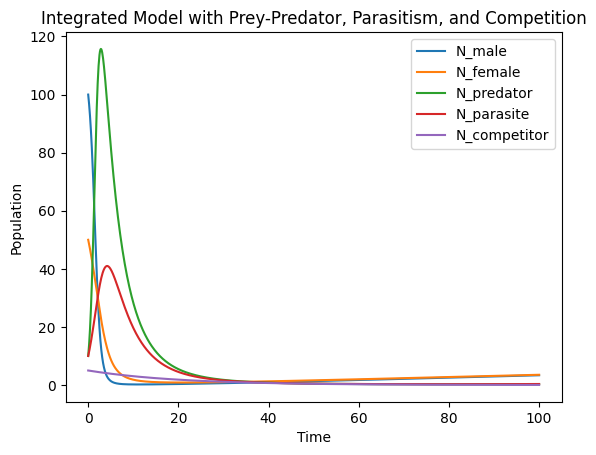

In [29]:
# 绘图
plt.plot(t, sol[:, 0], label='N_male')
plt.plot(t, sol[:, 1], label='N_female')
plt.plot(t, sol[:, 2], label='N_predator')
plt.plot(t, sol[:, 3], label='N_parasite')
plt.plot(t, sol[:, 4], label='N_competitor')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Integrated Model with Prey-Predator, Parasitism, and Competition')
plt.show()

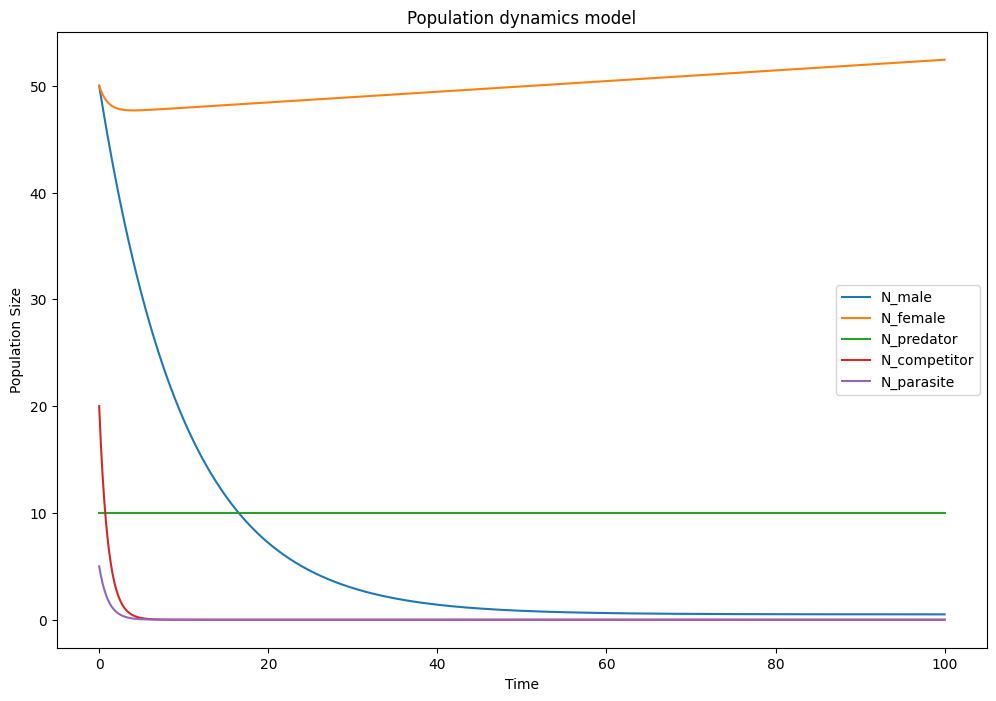

In [41]:
# 定义模型方程
def model(y, t, R, lambda_pred, lambda_para, s, b, alpha, gamma, delta, rho, f, G, prey, alligator, host):
    N_male, N_female, N_predator, N_competitor, N_parasite = y
    
    dN_male_dt = R * f(G) - lambda_pred * N_predator * N_male
    dN_female_dt = R * (1 - f(G)) - lambda_para * N_parasite * N_female
    dN_predator_dt = s * N_predator - b * N_predator * prey
    dN_competitor_dt = alpha * N_competitor - gamma * N_competitor * alligator
    dN_parasite_dt = delta * N_parasite - rho * N_parasite * host
    
    return [dN_male_dt, dN_female_dt, dN_predator_dt, dN_competitor_dt, dN_parasite_dt]

# 初始条件
R = 0.1
lambda_pred = 0.01
lambda_para = 0.01
s = 0.02
b = 0.0002
alpha = 0.03
gamma = 0.01
delta = 0.05
rho = 0.01
f = lambda G: 0.5
G = 1

# 初始条件
y0 = [50, 50, 10, 20, 5]

# 定义常数
prey = 100 #np.random.rand(N_predator)
alligator = 100 #np.random.rand(N_competitor)
host = 100#np.random.rand(N_parasite)

# 时间点
t = np.linspace(0, 100, 1000)

# 解常微分方程组
result = odeint(model, y0, t, args=(R, lambda_pred, lambda_para, s, b, alpha, gamma, delta, rho, f, G, prey, alligator, host))

# 绘图
plt.figure(figsize=(12, 8))
plt.plot(t, result[:, 0], label='N_male')
plt.plot(t, result[:, 1], label='N_female')
plt.plot(t, result[:, 2], label='N_predator')
plt.plot(t, result[:, 3], label='N_competitor')
plt.plot(t, result[:, 4], label='N_parasite')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Population dynamics model')
plt.show()
